# Computational Homework #6

**Due by midnight on Monday March 29, 2021**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

### Problem #1

#### For the teengamb data, fit a model with gamble as the response and the other variables as predictors. Look for violations of:

1. Constant Variance
2. Normality
3. Linearity

#### Write a short report detailing your findings.

In [1]:
library(faraway)
data(teengamb)


Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


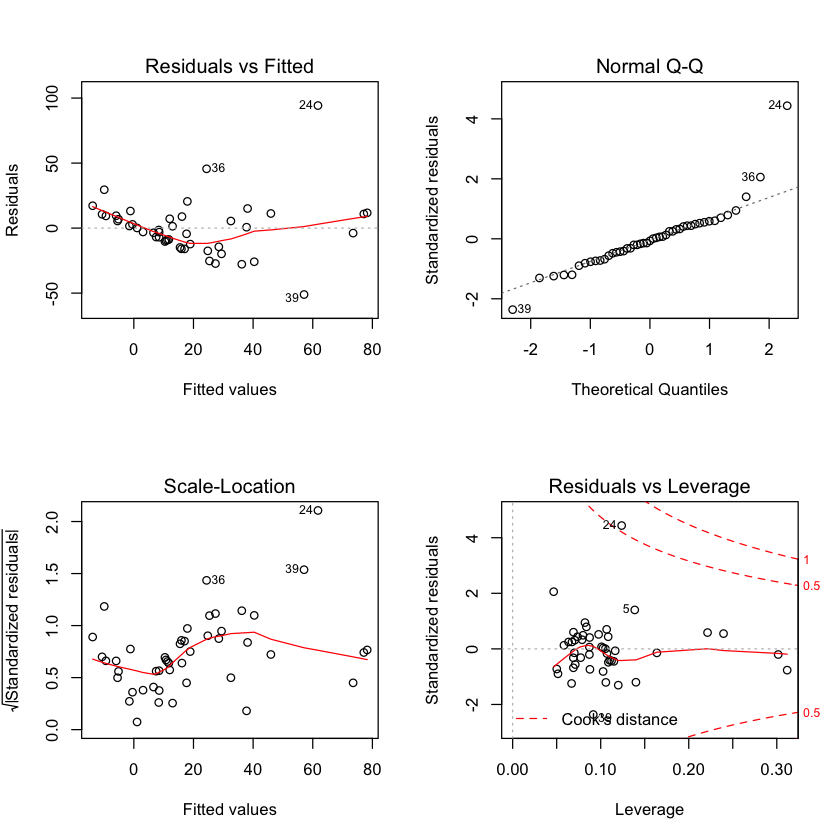

In [26]:
teengamb_model=lm(gamble~.,data=teengamb)
summary(teengamb_model)
par(mfrow = c(2,2))
plot(teengamb_model)

Answer:

The sex and income parameters are significantly correlated with gamble, while status and verbal are not significantly correlated with gamble. the adjusted R^2 for the test is 0.48, which means only 48% of the variance in the data is explained by the linear model. The residuals vs fitted plot has a fitted red line but the line is not a horizontal straight line, so it violates linearity. As the fitted values increase, the residuals become more spread out, so it also violates constant variance. The normal Q-Q plot looks normal, so it doesn't violate the normality.

### Problem #2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Fit the SLR model with sales as the response and radio as the predictor. Perform some diagnostic tests to see whether any SLR assumptions have been violated. Explain your findings.

In [1]:
adv <- read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt", sep = "")

In [2]:
slr=lm(sales~radio,data=adv)
summary(slr)


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


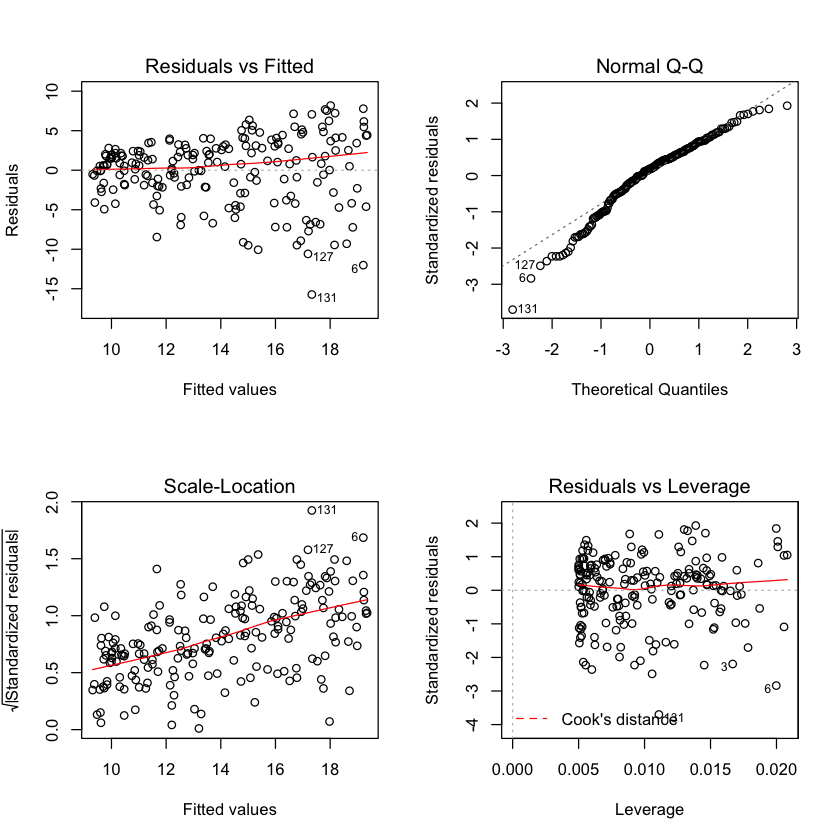

In [3]:
par(mfrow = c(2,2))
plot(slr)

Answer:

As fitted values increase, residuals increased, so constant variance has been violated.

#### (b) Produce a plot that isolates the effect of TV on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?


Call:
lm(formula = gammahat ~ deltahat)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.729 -22.600  -4.305  14.981 139.366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.176e-15  2.384e+00    0.00        1    
deltahat    1.849e+01  5.605e-01   32.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.72 on 198 degrees of freedom
Multiple R-squared:  0.8461,	Adjusted R-squared:  0.8453 
F-statistic:  1088 on 1 and 198 DF,  p-value: < 2.2e-16


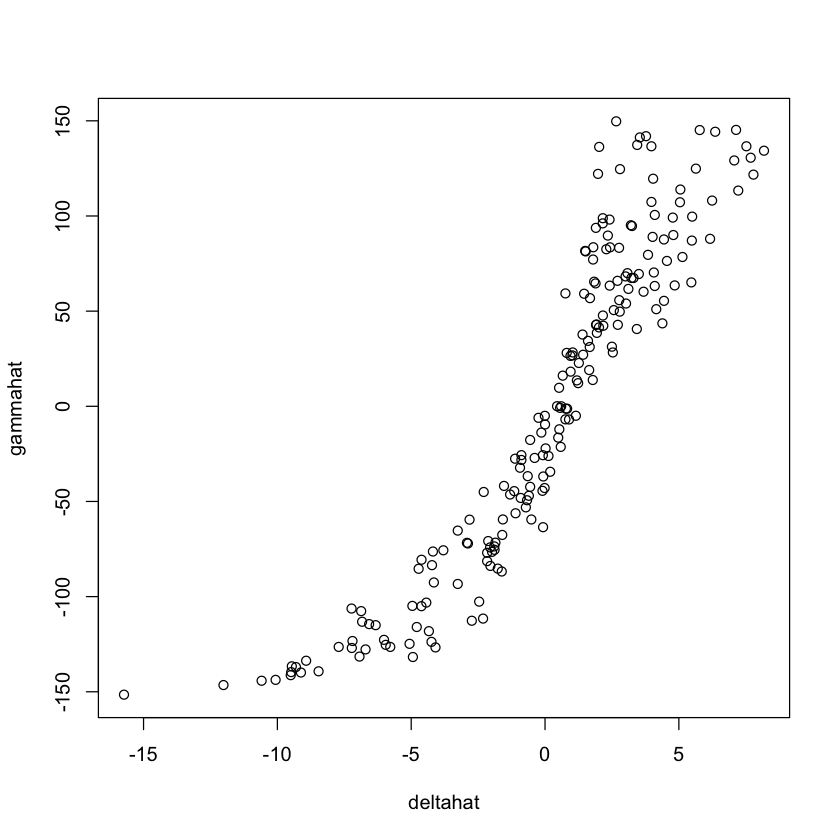

In [4]:
deltahat = residuals(slr)
gammahat = residuals(lm(TV~radio,data=adv))
summary(lm(gammahat~deltahat))
plot(deltahat,gammahat)

In [7]:
library(car)

Loading required package: carData


In [8]:
lmod=lm(sales~., data=adv)

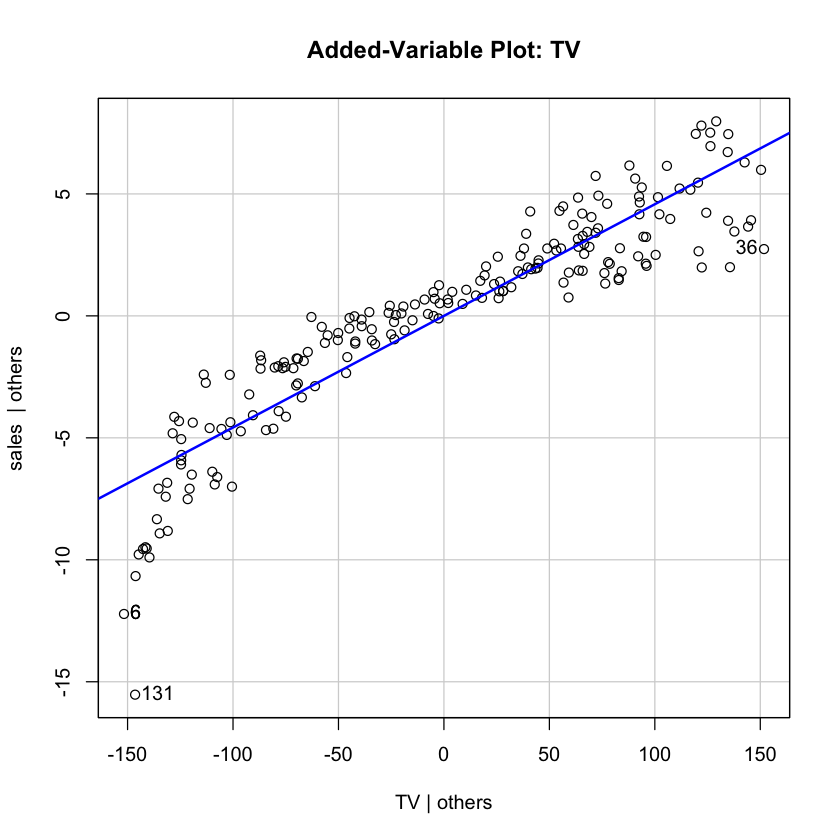

In [9]:
avPlot(lmod,'TV')

Answer:

There's a positive linear relationship between TV and sales based on the graph.

#### (c) Produce a plot that isolates the effect of newspaper on sales (adjusting for radio). What does this plot suggest about the relationship between these two variables?


Call:
lm(formula = gammahat ~ deltahat)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.729 -22.600  -4.305  14.981 139.366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.176e-15  2.384e+00    0.00        1    
deltahat    1.849e+01  5.605e-01   32.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.72 on 198 degrees of freedom
Multiple R-squared:  0.8461,	Adjusted R-squared:  0.8453 
F-statistic:  1088 on 1 and 198 DF,  p-value: < 2.2e-16


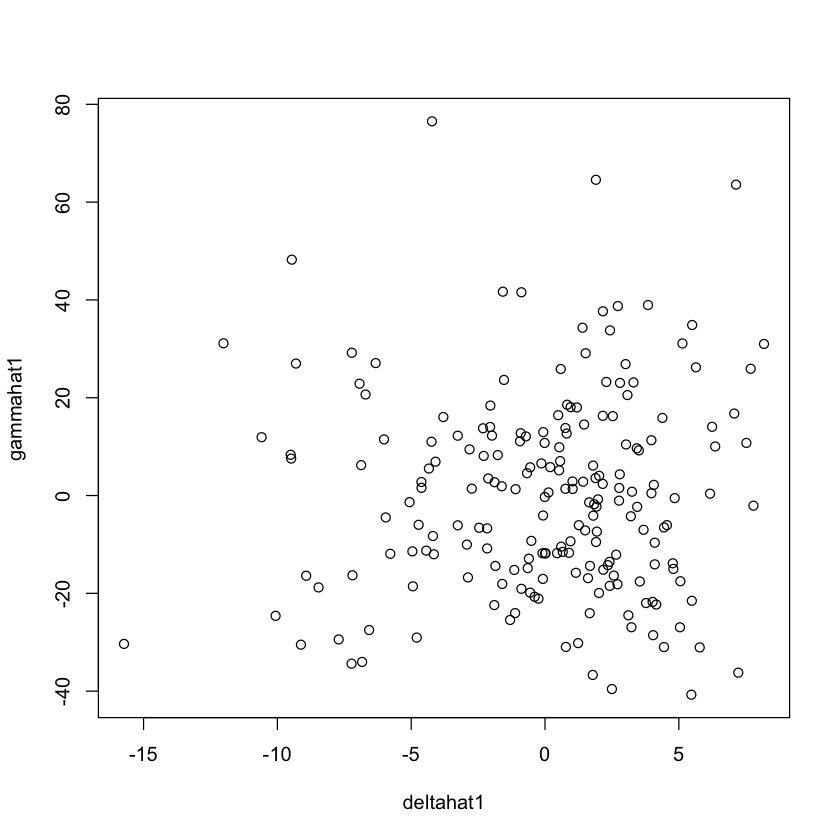

In [10]:
deltahat1 = residuals(slr)
gammahat1 = residuals(lm(newspaper~radio,data=adv))
summary(lm(gammahat~deltahat))
plot(deltahat1,gammahat1)

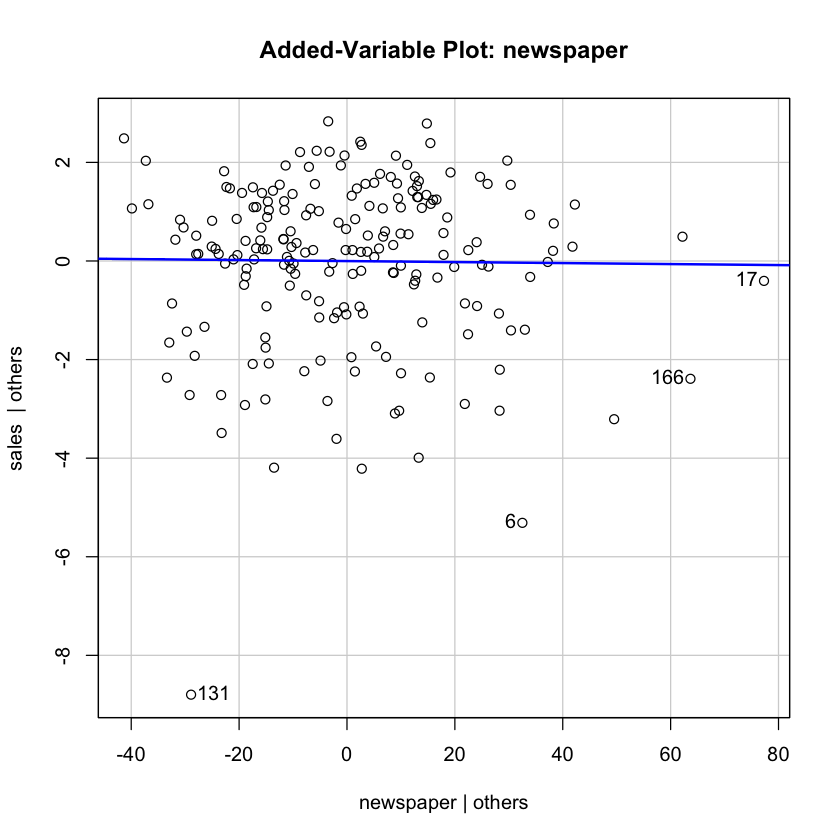

In [11]:
avPlot(lmod,'newspaper')

Answer:

It seems like there's no linear relationship between newspaper and sales based on the graph.

#### (d) Fit the MLR model that includes radio and TV. Does the inclusion of this predictor fix any issues that you dioagnosed in part (a)? Does it add any other issues?


Call:
lm(formula = sales ~ radio + TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
radio        0.18799    0.00804  23.382   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


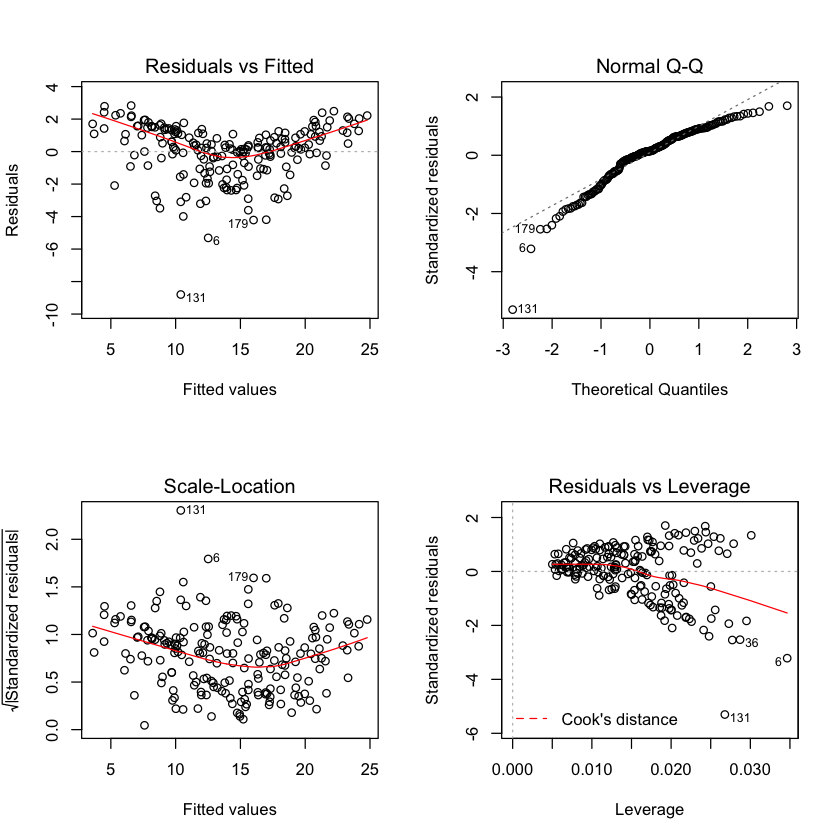

In [27]:
mlr=lm(sales~radio+TV,data=adv)
summary(mlr)
par(mfrow = c(2,2))
plot(mlr)

Answer:

It doesn't fix non-constant variance, and it added the problem of non-linearity. 

#### (e) Add TV^2 to the MLR model in part (d). How did this change the fit of the model? What conclusions might you draw?


Call:
lm(formula = sales ~ radio + TV + I(TV^2), data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3860 -0.8822 -0.0498  0.9613  3.5725 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.288e+00  3.588e-01   3.588 0.000421 ***
radio        1.930e-01  7.293e-03  26.465  < 2e-16 ***
TV           7.844e-02  4.985e-03  15.736  < 2e-16 ***
I(TV^2)     -1.136e-04  1.677e-05  -6.775 1.42e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.517 on 196 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9154 
F-statistic:   719 on 3 and 196 DF,  p-value: < 2.2e-16


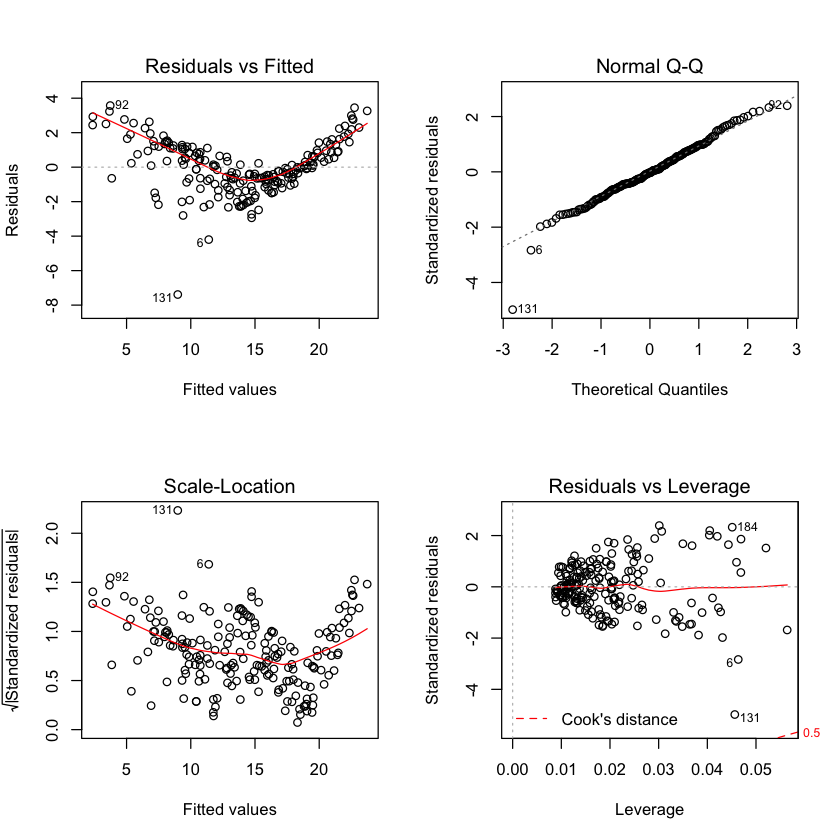

In [12]:
mlr2=lm(sales~radio+TV+I(TV^2),data=adv)
summary(mlr2)
par(mfrow = c(2,2))
plot(mlr2)

Answer:

The R^2 increased after adding TV^2, it's not surprising because we added an additional predictor. 
Other than that, nothing changed much after adding TV^2 to the MLR model in part (d), so the conclusion is that the added predictor doesn't change the model much. 


### Problem #3 

Researchers at the National Institutes of Standards and Technology (NIST) collected pipline data on ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depths of the defects were then remeasured in the laboratory. The laboratory measurements are more accurate than the field measurements, but more time consuming and expensive. We want to develop a regression model for correcting the in field measurements. 

#### (a) Fit a regression model where Lab is the response and Field is the predictor. Check for non-constant variance. 

In [8]:
data(pipeline); 


Call:
lm(formula = Lab ~ Field, data = pipeline)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.985  -4.072  -1.431   2.504  24.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.96750    1.57479  -1.249    0.214    
Field        1.22297    0.04107  29.778   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.865 on 105 degrees of freedom
Multiple R-squared:  0.8941,	Adjusted R-squared:  0.8931 
F-statistic: 886.7 on 1 and 105 DF,  p-value: < 2.2e-16


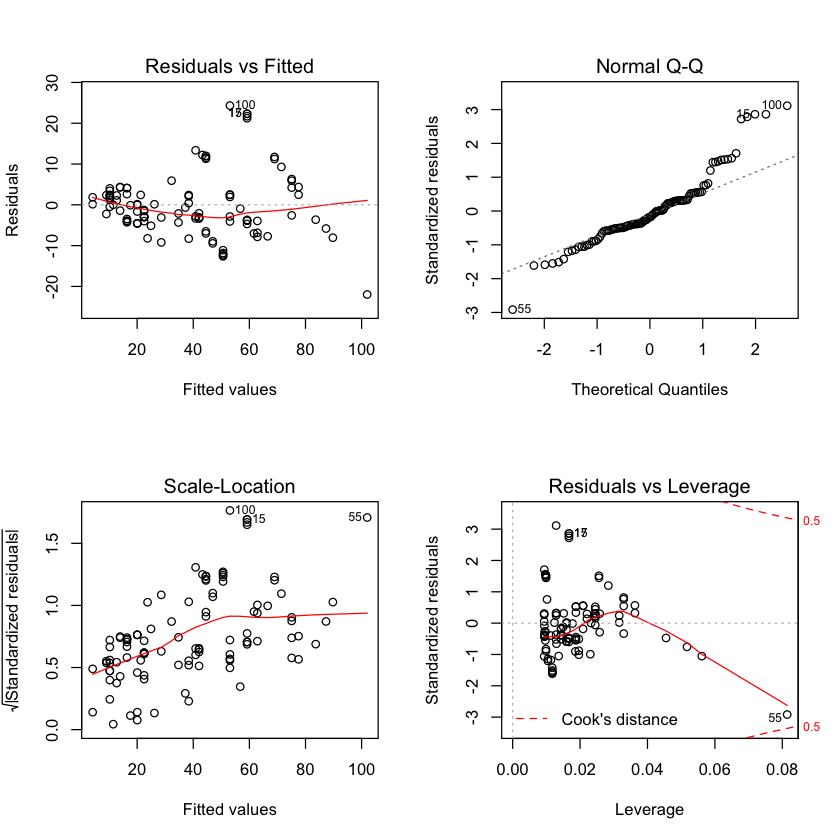

In [29]:
lmod=lm(Lab~Field,data=pipeline)
summary(lmod)
par(mfrow = c(2,2))
plot(lmod)

Answer:

As fitted values increase, residuals increased, so non-constant variance exists.

#### (b) Sometimes transforming the response and predictor helps in stabilizing variance. Find a transformation on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. Restrict your choice of transformation to square root, log, and inverse.

In [136]:
f<-function(x){
    log(x)
}
g<-function(x){
    sqrt(x)
}
h<-function(x){
    x^-1
}

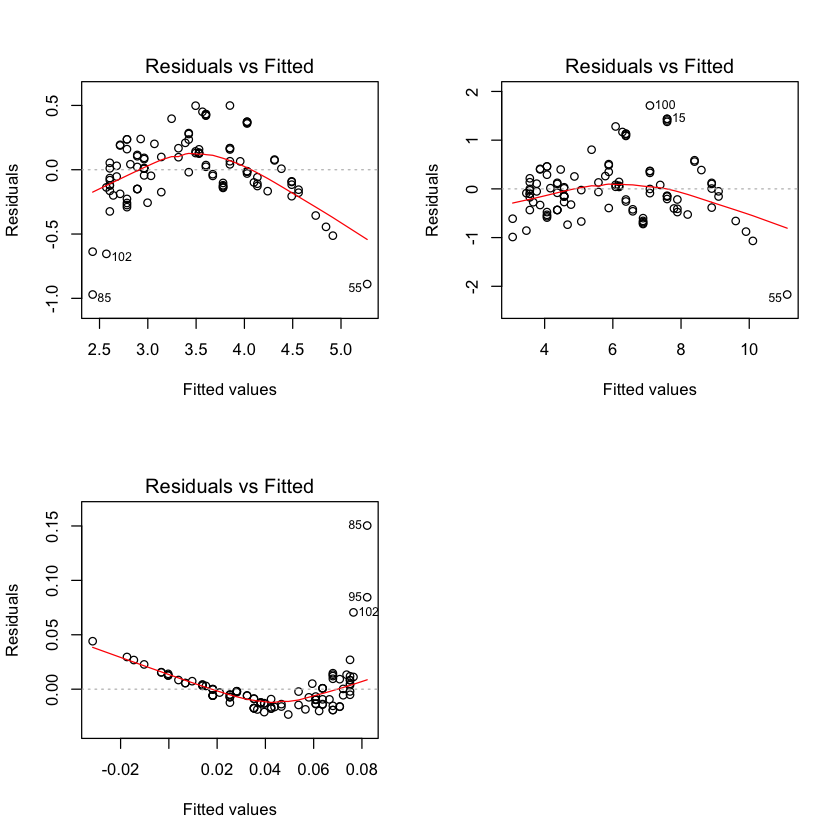

In [180]:
par(mfrow = c(2,2))
plot(lm(f(Lab)~Field,data=pipeline),1)
plot(lm(g(Lab)~Field,data=pipeline),1)
plot(lm(h(Lab)~Field,data=pipeline),1)

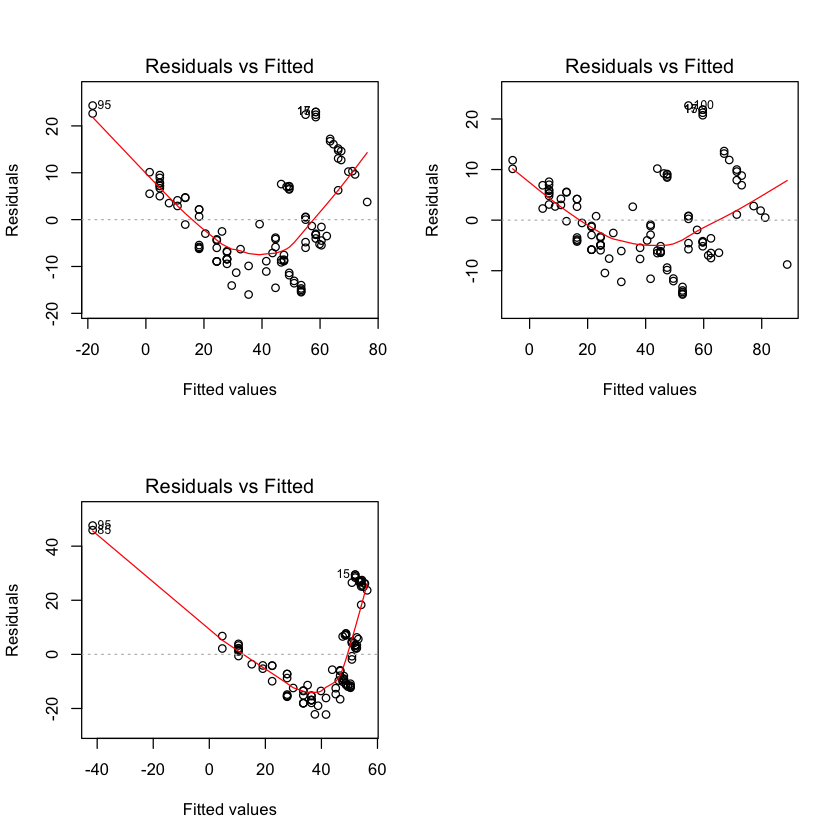

In [178]:
par(mfrow = c(2,2))
plot(lm(Lab~f(Field),data=pipeline),1)
plot(lm(Lab~g(Field),data=pipeline),1)
plot(lm(Lab~h(Field),data=pipeline),1)

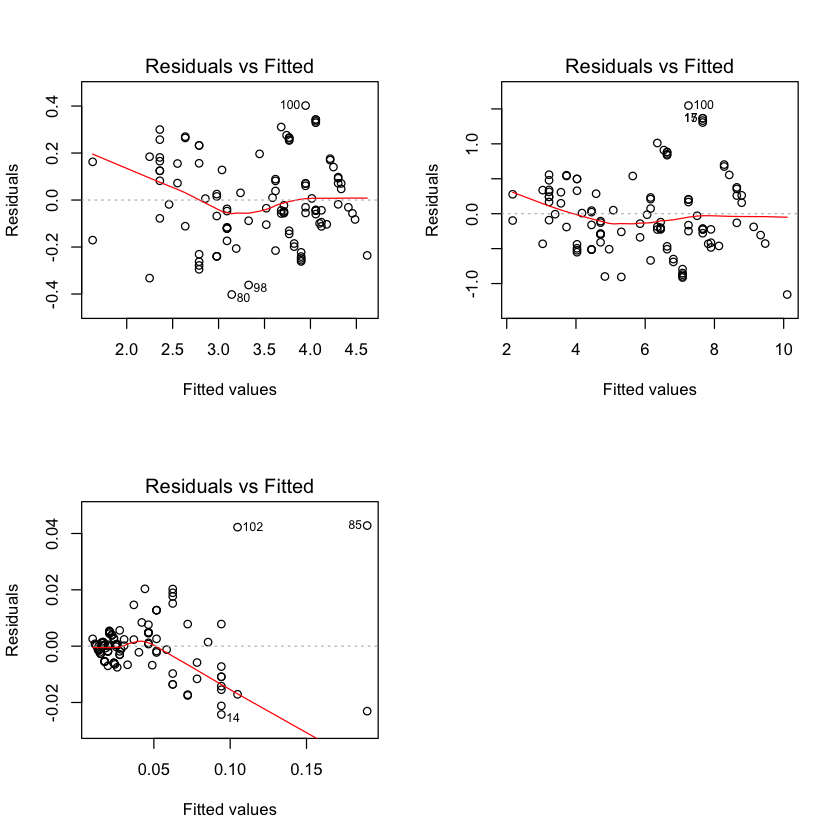

In [187]:
par(mfrow = c(2,2))
#the second plot, sqrt(Lab)~sqrt(field),it looks like the relationship is approximately linear with constant variance.
plot(lm(f(Lab)~f(Field),data=pipeline),1)
plot(lm(g(Lab)~g(Field),data=pipeline),1)
plot(lm(h(Lab)~h(Field),data=pipeline),1)

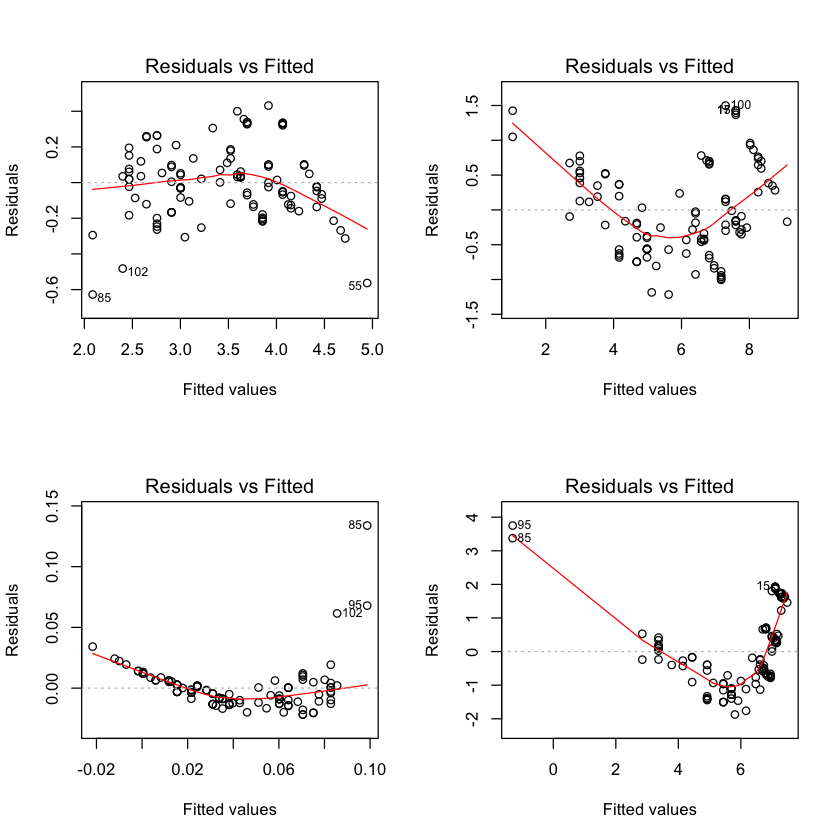

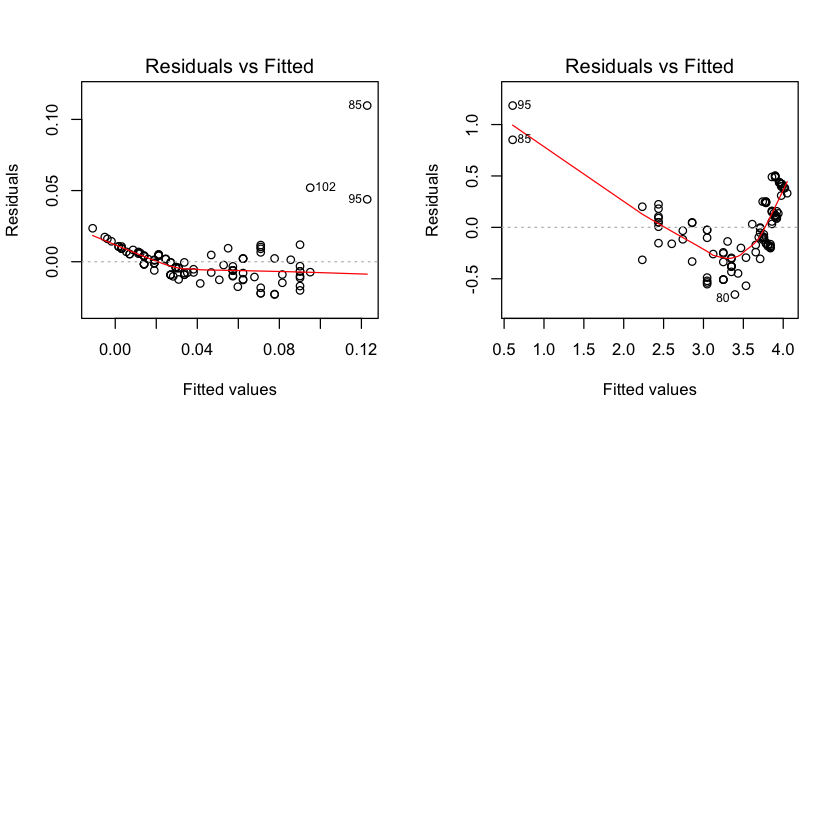

In [186]:
par(mfrow = c(2,2))
plot(lm(f(Lab)~g(Field),data=pipeline),1)
plot(lm(g(Lab)~f(Field),data=pipeline),1)
plot(lm(h(Lab)~g(Field),data=pipeline),1)
plot(lm(g(Lab)~h(Field),data=pipeline),1)
plot(lm(h(Lab)~f(Field),data=pipeline),1)
plot(lm(f(Lab)~h(Field),data=pipeline),1)

Answer:

I think when we transform Lab with square root and Fields with square root, the the relationship is approximately linear with constant variance.


#### (c) Now let's try weighted least squares. The code below splits the range of Field into 12 groups of size nine (except for the last goup which has only eight values). Within each group, we compute the variance of Lab as varlab and the mean of Field as meanfield. Add comments to the code to demonstrate what each line is doing.

In [11]:
#the index of the fields in order (i[1]is the index in the fields that has the smallest value)
i = order(pipeline$Field); 
#order the pipeline data by field's order (from smallest to biggest)
npipe = pipeline[i,]; 
#divide into levels
ff = gl(12,9)[-108]; 
#the mean value of field in each of the 12 levels
meanfield = unlist(lapply(split(npipe$Field,ff),mean))
#the variance of field in each of the 12 levels
varlab = unlist(lapply(split(npipe$Lab,ff),var))

#### Suppose that the variance in the repsonse is linked to the predictor in the following way: $$ Var(Lab) = a_0Field^{a_1}.$$ Use simple linear regression on (transformations of) varlab and meanfield to estimate $a_0$ and $a_1$. Use these estimates to perform weighted least squares where the weights are the inverse of the variance of Lab. Print a summary of this model and comment on the fit.

In [32]:
slr_var=lm(log(varlab)~log(meanfield))

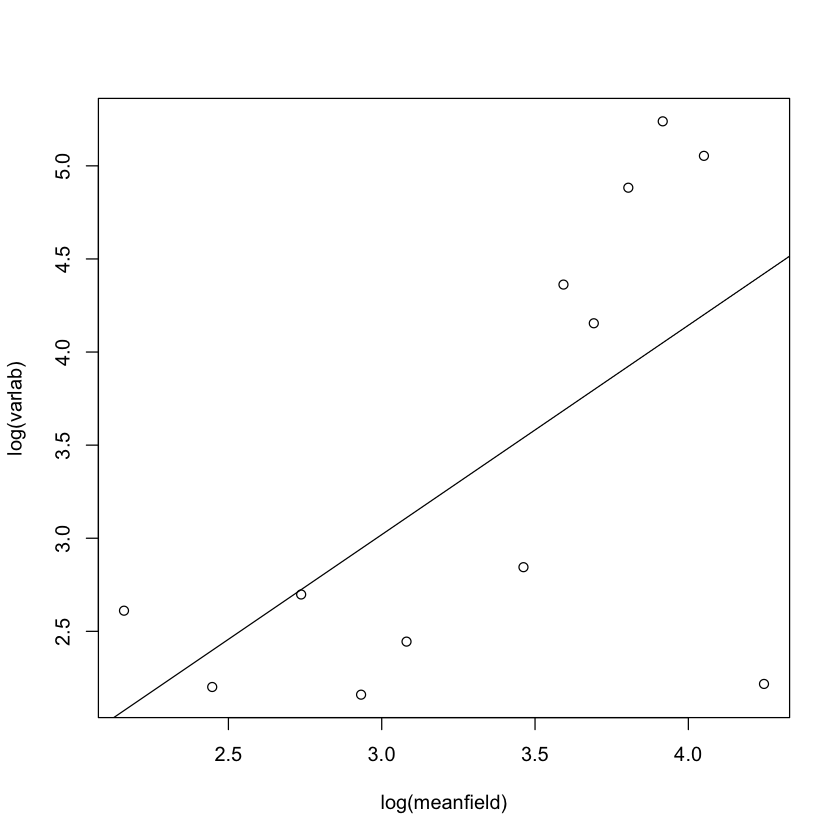

In [46]:
par(mfrow = c(1,1))
plot(log(meanfield),log(varlab))
abline(slr_var)

In [38]:
a = coef(slr_var);
w = with(pipeline, exp(a[1])*Field^(a[2]));

In [41]:
lmodwls = lm(Lab ~ Field, data = pipeline, weights = 1/w)
summary(lmodwls)


Call:
lm(formula = Lab ~ Field, data = pipeline, weights = 1/w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.0826 -0.8102 -0.3189  0.6212  3.4429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.49436    0.90707  -1.647    0.102    
Field        1.20828    0.03488  34.637   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.169 on 105 degrees of freedom
Multiple R-squared:  0.9195,	Adjusted R-squared:  0.9188 
F-statistic:  1200 on 1 and 105 DF,  p-value: < 2.2e-16


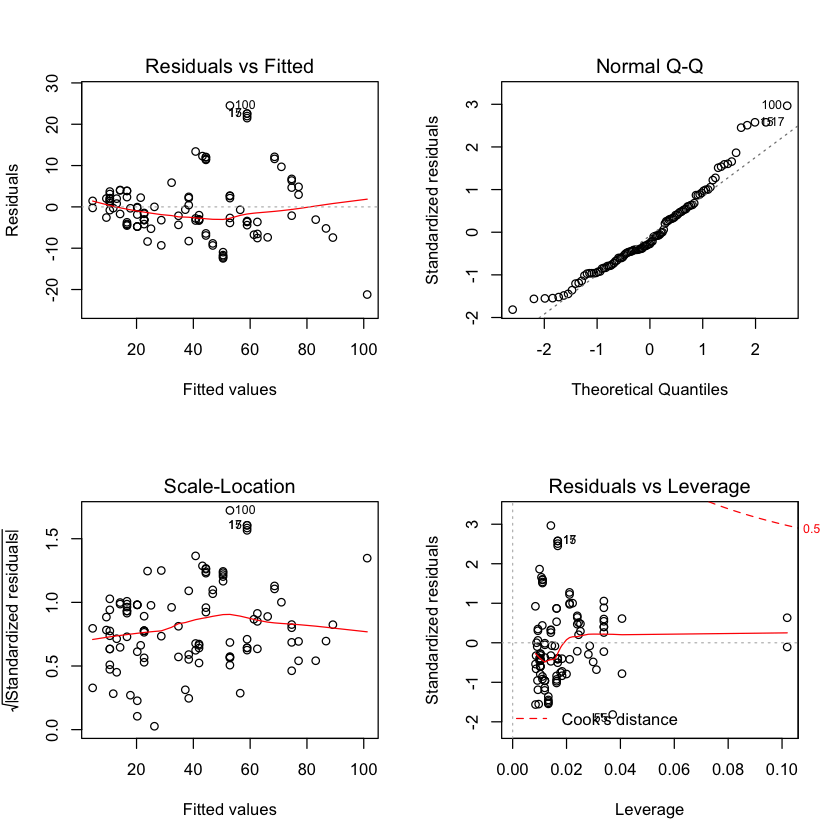

In [42]:
par(mfrow = c(2,2))
plot(lmodwls)

Answer:


Based on the summary, the p value of the field coefficient is significant. The model violated constant variance becasue as fitted values increase, residuals also increase. The model satisfies linearity and normality.